<a href="https://colab.research.google.com/github/MarzukhAsjad/ML_AI_projects/blob/main/Edge_detection_using_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# function to display image
def display(imgPath):
    img = plt.imread(imgPath)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# sobel operator kernel
# sobel operator in x direction
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# sobel operator in y direction
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

In [ ]:
# define a function to convert an image to grayscale
def rgb2gray(rgb):       
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
# define the function for edge detection
def EdgeDetect(ImgPath):
    # initialise an array for output
    output = []

    # read the image 
    img = plt.imread(ImgPath)

    # convert the image to grayscale
    img_gray = rgb2gray(img)

    # 0-pad the border of image
    row, col = img_gray.shape
    row_0 = [0 for i in range(0, row+2)]
    col_0 = [0 for i in range(0, col)]
    
    # add columnwise 0s
    arr = np.insert(img_gray, 0, values=col_0, axis=0)
    arr = np.insert(arr, row+1, values=col_0, axis=0)
    # add rowwise 0s
    arr = np.insert(arr, 0, values=row_0, axis=1)
    arr = np.insert(arr, col+1, values=row_0, axis=1)

    img_extended = np.array(arr)
    
    fx, fy = [], []
    # convolve the kernel across the img and generate an fx and fy
    for i in range(1, row+1):
        for j in range(1, col+1):
            temp = np.array([[img_extended[b][a] for a in range(j-1, j+2)] for b in range(i-1, i+2)])
            dot_matrix_x = np.dot(temp, sobel_x)
            dot_matrix_y = np.dot(temp, sobel_y)
            fx.append(np.sum(dot_matrix_x))
            fy.append(np.sum(dot_matrix_y))
    
    # calculate the Gx and Gy for both directions
    Gx = np.reshape(np.array(fx), img_gray.shape) 
    Gy = np.reshape(np.array(fy), img_gray.shape)
    
    # preprocessing such as absolute valuing the Gx and Gy
    abs_Gx = np.absolute(Gx)
    abs_Gy = np.absolute(Gy)

    # Then we calculate the gradient magnitude
    grad = np.sqrt(np.square(abs_Gx) + np.square(abs_Gy))

    # Then we normalise it
    scaled_grad = np.uint8(255*grad/np.max(grad))

    # show the image
    plt.imshow(scaled_grad, cmap='gray')
    plt.axis('off')
    plt.show()

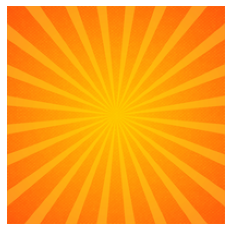

In [ ]:
display("pic0.png")

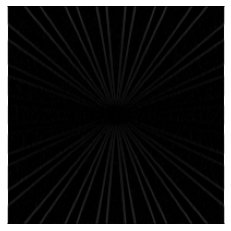

In [ ]:
EdgeDetect("pic0.png")

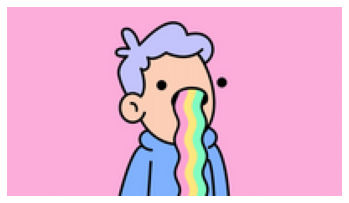

In [ ]:
display("pic1.png")

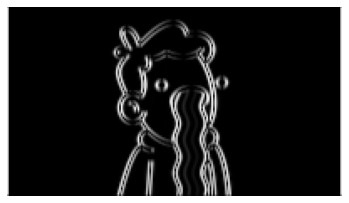

In [ ]:
EdgeDetect("pic1.png")

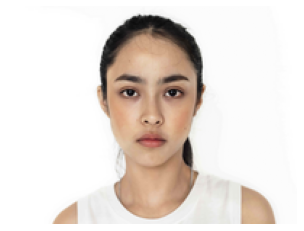

In [ ]:
display("pic2.png")

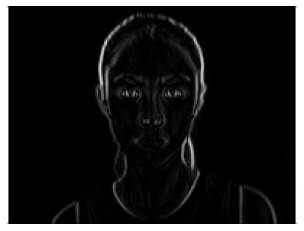

In [ ]:
EdgeDetect("pic2.png")

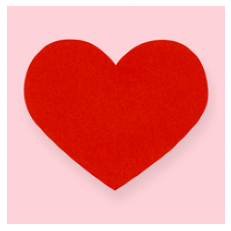

In [ ]:
display("pic3.png")

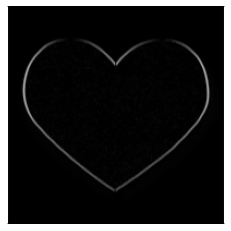

In [ ]:
EdgeDetect("pic3.png")

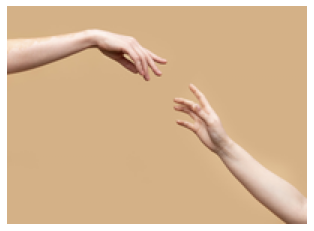

In [ ]:
display("pic4.png")

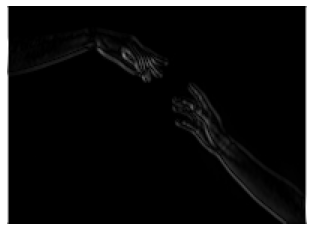

In [ ]:
EdgeDetect("pic4.png")

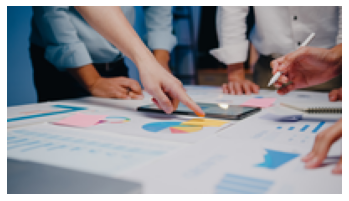

In [ ]:
display("pic5.png")

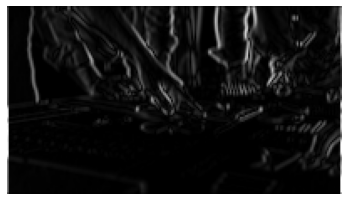

In [ ]:
EdgeDetect("pic5.png")

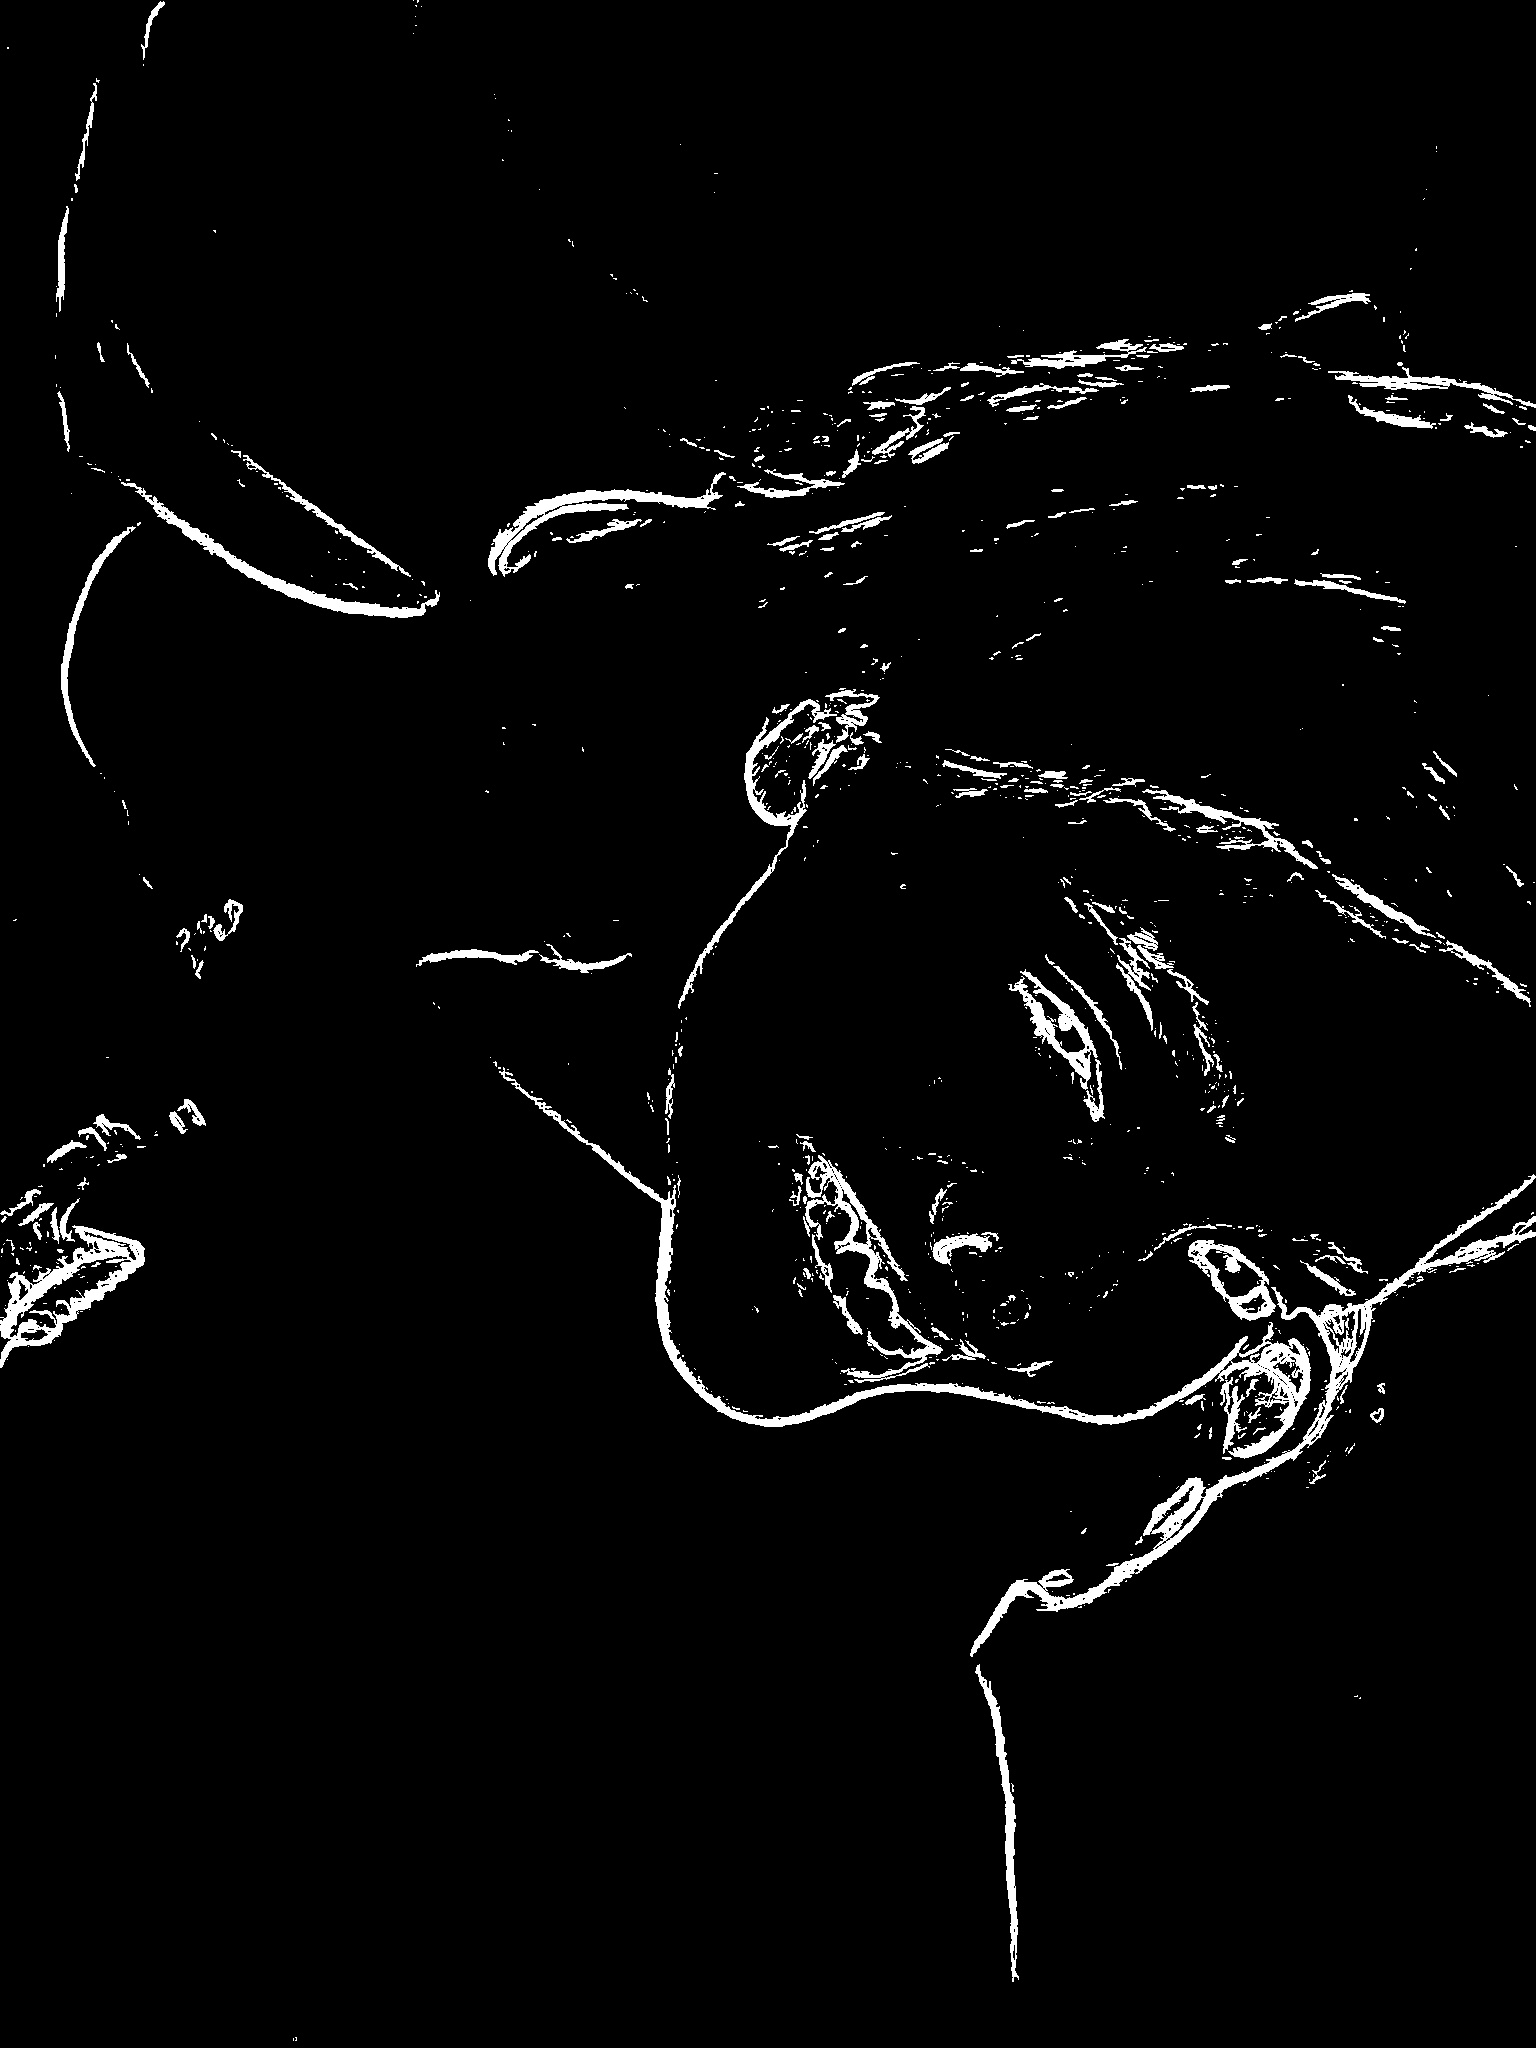

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("IMG-20221115-WA0010.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)

grad = np.sqrt(np.square(abs_sobelx) + np.square(abs_sobely))
scaled_grad = np.uint8(255*grad/np.max(grad))
_, thresh = cv2.threshold(scaled_grad, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-107-affb8024eeda>:9: RuntimeWarning: invalid value encountered in true_divide
  scaled_filtered_img = np.uint8(255*filtered_img/np.max(filtered_img))


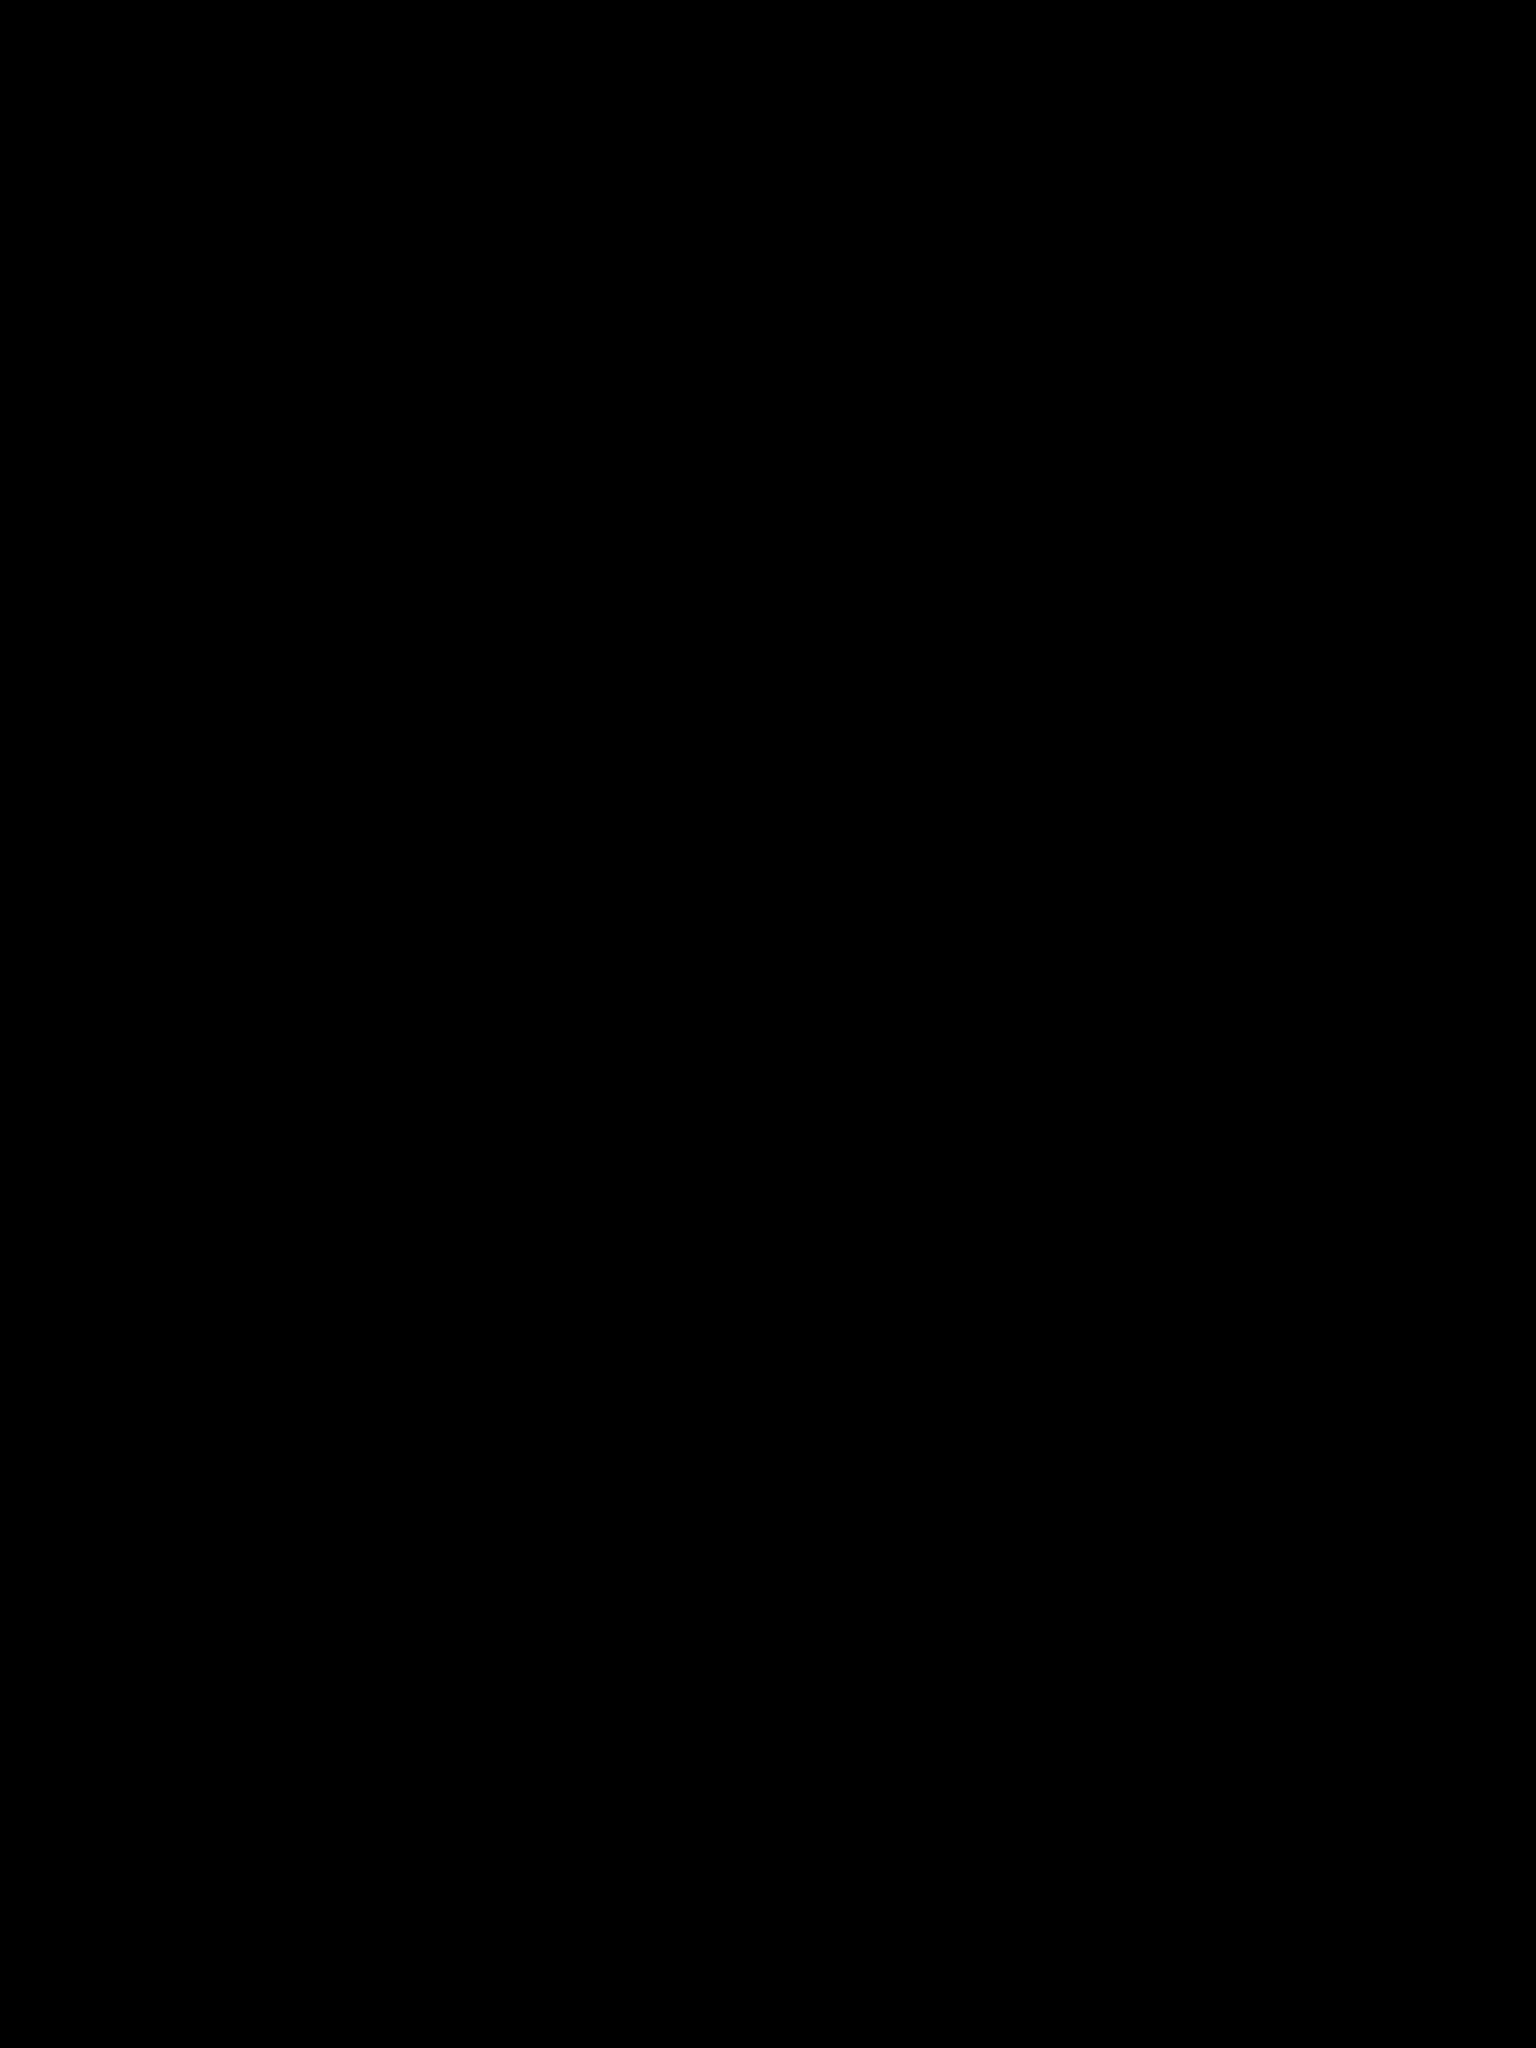

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filtered_img = cv2.filter2D(grey, -1, kernel)

scaled_filtered_img = np.uint8(255*filtered_img/np.max(filtered_img))

cv2_imshow(scaled_filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
